In [368]:
import scipy.io as sio
import os

path = 'C:/Users/DarkB/Downloads/ML Python Scripts/Project 1/ImsAndSegs'

# mat_contents = []
# for filename in os.listdir(path):
#     print(path+'/'+filename)
#     mat_contents = mat_contents.append(sio.loadmat(path+'/'+filename))
z = sio.loadmat('C:/Users/DarkB/Downloads/ML Python Scripts/Project 1/ImsAndSegs/ImsAndTruths100075.mat')
y = z['Im']
x = z['Seg1']

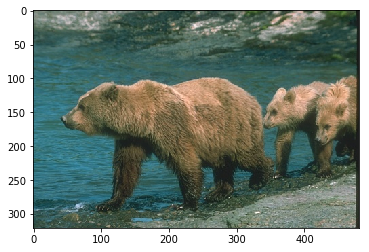

In [369]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

plt.imshow(y)
plt.show()

## K-Means Algorithm Implementation

#### Using original data

KMeans clustering time to do: 1.97s


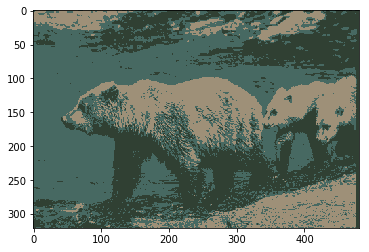

In [341]:
import time
from sklearn.cluster import KMeans
import numpy as np

#From original data
#Reshape to 2D - one column per rgb colour
data = y.reshape(y.shape[0] * y.shape[1], 3)

# Initializing KMeans
kmeans = KMeans(n_clusters=3)


t0 = time.time()
# Fitting with inputs
kmeans = kmeans.fit(data)

#Finding lables for inputs
labels = kmeans.predict(data)

# Find corresponding center to data
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]
t1 = time.time()

# Reshape data to 3D 
y_recolored = new_colors.reshape(y.shape)
y_recolored = y_recolored.astype(np.uint8)

# #Plot data
title = 'KMeans clustering time to do: %.2fs' % (t1 - t0)
print(title)
plt.imshow(y_recolored)
plt.show()

#### Using PCA for the data

KMenas clustering time to do: 1.47s


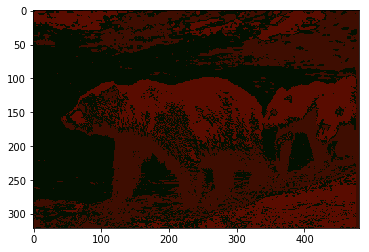

In [208]:
from sklearn.decomposition import PCA

#Using PCA
pca = PCA(n_components=3)
reduced_data = pca.fit_transform(data)

# Initializing KMeans
kmeans = KMeans(n_clusters=3)
# Fitting with inputs

t0 = time.time()
kmeans = kmeans.fit(reduced_data)

new_colors = kmeans.cluster_centers_[kmeans.predict(reduced_data)]
t1 = time.time()
y_recolored = np.absolute(new_colors.reshape(y.shape)) #I should not be doing absolute
y_recolored = y_recolored.astype(np.uint8)
plt.imshow(y_recolored)
title = 'KMeans clustering time to do: %.2fs' % (t1 - t0)
print(title)
plt.show()


#### Downsampling the data

KMeans clustering time to do: 0.11s


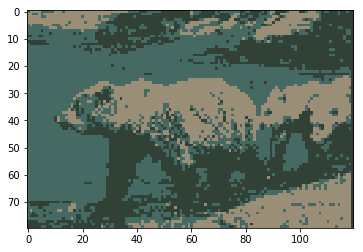

In [370]:
from skimage.transform import rescale
#Using Downsample

r = rescale(y,0.25,mode='reflect')
data = r.reshape(r.shape[0] * r.shape[1], 3)

# Initializing KMeans
kmeans = KMeans(n_clusters=3)
# Fitting with inputs
t0 = time.time()
kmeans = kmeans.fit(data)

new_colors = kmeans.cluster_centers_[kmeans.predict(data)]
t1 = time.time()
r_recolored = new_colors.reshape(r.shape)
plt.imshow(r_recolored)
title = 'KMeans clustering time to do: %.2fs' % (t1 - t0)
print(title)
plt.show()

#### Using grey scale of data

KMeans clustering time to do: 0.13s


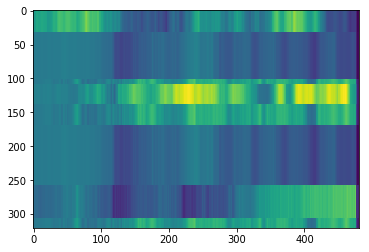

In [210]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

#Turn into grayscale
bears_gray = rgb2gray(y)

# Initializing KMeans
kmeans = KMeans(n_clusters=5)
# Fitting with inputs
t0 = time.time()
kmeans = kmeans.fit(bears_gray)

new_colors = kmeans.cluster_centers_[kmeans.predict(bears_gray)]
t1 = time.time()
# r_recolored = new_colors.reshape(r.shape)
plt.imshow(new_colors)
title = 'KMeans clustering time to do: %.2fs' % (t1 - t0)
print(title)
plt.show()

#### The big issue here is the illumination, which is a big problem for machine learning

## Self-Organizing Map Algorithm Implementation

#### Example implementation - Using MiniSom library

training...
quantization...
building new image...
done.


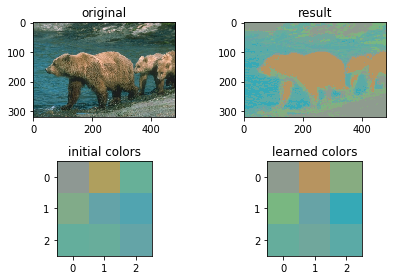

In [5]:
from minisom import MiniSom

import numpy as np
import matplotlib.pyplot as plt

# reshaping the pixels matrix
pixels = np.reshape(y, (y.shape[0]*y.shape[1], 3))

# SOM initialization and training
print('training...')
som = MiniSom(3, 3, 3, sigma=0.1, learning_rate=0.2)  # 3x3 = 9 final colors
som.random_weights_init(pixels)
starting_weights = som.get_weights().copy()  # saving the starting weights
som.train_random(pixels, 100)

print('quantization...')
qnt = som.quantization(pixels)  # quantize each pixels of the image
print('building new image...')
clustered = np.zeros(y.shape)
for i, q in enumerate(qnt):  # place the quantized values into a new image
    clustered[np.unravel_index(i, dims=(y.shape[0], y.shape[1]))] = q
print('done.')

# show the result
plt.figure(1)
plt.subplot(221)
plt.title('original')
plt.imshow(y)
plt.subplot(222)
plt.title('result')
plt.imshow(clustered)

plt.subplot(223)
plt.title('initial colors')
plt.imshow(starting_weights, interpolation='none')
plt.subplot(224)
plt.title('learned colors')
plt.imshow(som.get_weights(), interpolation='none')

plt.tight_layout()
plt.show()

Self-Organizing Map clustering time to do: 0.10s


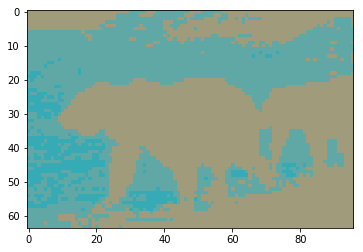

In [371]:
from minisom import MiniSom

import numpy as np
import matplotlib.pyplot as plt
# reshaping the pixels matrix
r = rescale(y,0.2,mode='reflect')
pixels = np.reshape(r, (r.shape[0]*r.shape[1], 3))

n_clusters = 3

t0 = time.time()
som = MiniSom(1,n_clusters, 3, sigma=0.1, learning_rate=0.2)  # 3x1 = 3 final colors
som.random_weights_init(pixels)
starting_weights = som.get_weights().copy()  # saving the starting weights
som.train_random(pixels, 100)

qnt = som.quantization(pixels)  # quantize each pixels of the image
clustered = np.zeros(r.shape)
for i, q in enumerate(qnt):  # place the quantized values into a new image
    clustered[np.unravel_index(i, dims=(r.shape[0], r.shape[1]))] = q
t1 = time.time()

# plt.figure(1)
# plt.subplot(221)
plt.imshow(clustered)
title = 'Self-Organizing Map clustering time to do: %.2fs' % (t1 - t0)
print(title)
# plt.subplot(223)
# plt.title('learned colors')
# plt.imshow(som.get_weights(), interpolation='none')
plt.show()

## Fuzzy C-Means Algorithm Implementation

#### Using grey scale data

Fuzzy C-Means clustering time to do: 0.12s


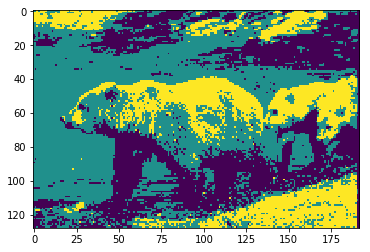

In [372]:
import skfuzzy
from skimage.transform import rescale


#Using Downsample
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

#Turn into grayscale
bears_gray = rgb2gray(y)

# Rescale and reshape data
r = rescale(bears_gray,0.4,mode='reflect')
I = r.reshape((1, -1))

n_clusters = 3
t0 = time.time()
# Run algorithm
fzz = skfuzzy.cluster.cmeans(I, c = n_clusters, m = 2, error=0.005, maxiter=1000)
t1 = time.time()
#Find clustering from fuzzy segmentation
img_clustered = np.argmax(fzz[1], axis=0).astype(float)
img_clustered.shape = r.shape

plt.imshow(img_clustered)
title = 'Fuzzy C-Means clustering time to do: %.2fs' % (t1 - t0)
print(title)
plt.show()

## Spectral Clustering Algorithm Implementation

##### Using orignal data - Don't run this! it takes forever

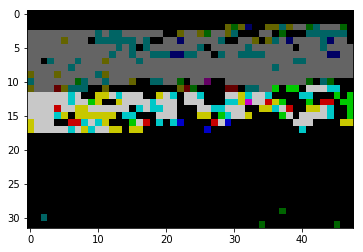

In [41]:
# from sklearn.cluster import spectral_clustering
# from sklearn.feature_extraction import image
# from skimage.transform import downscale_local_mean
# from skimage.transform import rescale
# from skimage.transform import resize
# from sklearn.preprocessing import scale

# bears = rescale(y,0.1,mode='reflect')

# # Convert the image into a graph with the value of the gradient on the
# # edges.
# # mask = bears.astype(bool)
# graph = image.img_to_graph(bears)#, mask=mask)

# # Take a decreasing function of the gradient: an exponential
# # The smaller beta is, the more independent the segmentation is of the
# # actual image. For beta=1, the segmentation is close to a voronoi
# beta = 5
# eps = 1e-6
# graph.data = np.exp(-beta * graph.data / graph.data.std()) + eps

# labels = spectral_clustering(graph, n_clusters=3)
# # label_im = -np.ones(mask.shape)
# # label_im[mask] = labels

# labels = labels.reshape(bears.shape)

# plt.imshow(labels)
# plt.show()

#### This one is based on the example - works but we lose the color data

Spectral clustering: kmeans, 2.67s
Spectral clustering: discretize, 2.91s


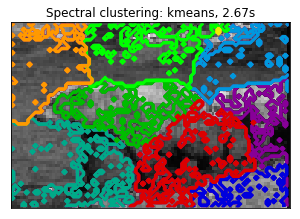

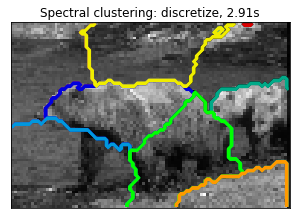

In [345]:
import time
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

from sklearn.feature_extraction import image
from sklearn.cluster import spectral_clustering


def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

#Turn into grayscale
bears_gray = rgb2gray(y)

# Resize it to 10% of the original size to speed up the processing
bears_gray = rescale(bears_gray,0.2,mode='reflect')

# Convert the image into a graph with the value of the gradient on the
# edges.
graph = image.img_to_graph(bears_gray)

# Take a decreasing function of the gradient: an exponential
# The smaller beta is, the more independent the segmentation is of the
# actual image. For beta=1, the segmentation is close to a voronoi
beta = 5
eps = 1e-6
graph.data = np.exp(-beta * graph.data / graph.data.std()) + eps

# Apply spectral clustering (this step goes much faster if you have pyamg
# installed)
N_REGIONS = 10

for assign_labels in ('kmeans', 'discretize'):
    t0 = time.time()
    labels = spectral_clustering(graph, n_clusters=N_REGIONS,
                                 assign_labels=assign_labels, random_state=1)
    t1 = time.time()
    labels = labels.reshape(bears_gray.shape)

    plt.figure(figsize=(5, 5))
    plt.imshow(bears_gray, cmap=plt.cm.gray)
    for l in range(N_REGIONS):
        plt.contour(labels == l,
                    colors=[plt.cm.nipy_spectral(l / float(N_REGIONS))])
    plt.xticks(())
    plt.yticks(())
    title = 'Spectral clustering: %s, %.2fs' % (assign_labels, (t1 - t0))
    print(title)
    plt.title(title)
plt.show()

#### This one uses the example and colors the separete regions

Spectral clustering time to do: 0.23s


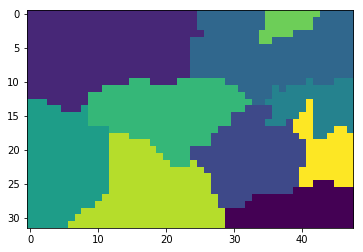

In [373]:
import time
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

from sklearn.feature_extraction import image
from sklearn.cluster import spectral_clustering

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

#Turn into grayscale
bears_gray = rgb2gray(y)

bears_gray = rescale(bears_gray,0.1,mode='reflect')

graph = image.img_to_graph(bears_gray)#, mask=mask)

beta = 5
eps = 1e-6
graph.data = np.exp(-beta * graph.data / graph.data.std()) + eps

n_clusters = 10

t0 = time.time()
labels = spectral_clustering(graph, n_clusters=n_clusters, assign_labels = 'discretize')
t1 = time.time()
labels = labels.reshape(bears_gray.shape)


title = 'Spectral clustering time to do: %.2fs' % (t1 - t0)
print(title)
plt.imshow(labels)
plt.show()

#### These are two examples I based myself from

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt

# from sklearn.feature_extraction import image
# from sklearn.cluster import spectral_clustering

# l = 100
# x, y = np.indices((l, l))

# center1 = (28, 24)
# center2 = (40, 50)
# center3 = (67, 58)
# center4 = (24, 70)

# radius1, radius2, radius3, radius4 = 16, 14, 15, 14

# circle1 = (x - center1[0]) ** 2 + (y - center1[1]) ** 2 < radius1 ** 2
# circle2 = (x - center2[0]) ** 2 + (y - center2[1]) ** 2 < radius2 ** 2
# circle3 = (x - center3[0]) ** 2 + (y - center3[1]) ** 2 < radius3 ** 2
# circle4 = (x - center4[0]) ** 2 + (y - center4[1]) ** 2 < radius4 ** 2

# # #############################################################################
# # 4 circles
# img = circle1 + circle2 + circle3 + circle4

# # We use a mask that limits to the foreground: the problem that we are
# # interested in here is not separating the objects from the background,
# # but separating them one from the other.
# mask = img.astype(bool)

# img = img.astype(float)
# img += 1 + 0.2 * np.random.randn(*img.shape)

# # Convert the image into a graph with the value of the gradient on the
# # edges.
# graph = image.img_to_graph(img, mask=mask)

# # Take a decreasing function of the gradient: we take it weakly
# # dependent from the gradient the segmentation is close to a voronoi
# graph.data = np.exp(-graph.data / graph.data.std())

# # Force the solver to be arpack, since amg is numerically
# # unstable on this example
# labels = spectral_clustering(graph, n_clusters=4, eigen_solver='arpack')
# label_im = -np.ones(mask.shape)
# label_im[mask] = labels
# label_im.shape

# plt.matshow(img)
# plt.matshow(label_im)


# import time

# import numpy as np
# import scipy as sp
# import matplotlib.pyplot as plt

# from sklearn.feature_extraction import image
# from sklearn.cluster import spectral_clustering


# # load the raccoon face as a numpy array
# try:  # SciPy >= 0.16 have face in misc
#     from scipy.misc import face
#     face = face(gray=True)
# except ImportError:
#     face = sp.face(gray=True)

# # Resize it to 10% of the original size to speed up the processing
# face = rescale(face,0.1,mode='reflect')

# # Convert the image into a graph with the value of the gradient on the
# # edges.
# graph = image.img_to_graph(face)

# # Take a decreasing function of the gradient: an exponential
# # The smaller beta is, the more independent the segmentation is of the
# # actual image. For beta=1, the segmentation is close to a voronoi
# beta = 5
# eps = 1e-6
# graph.data = np.exp(-beta * graph.data / graph.data.std()) + eps

# # Apply spectral clustering (this step goes much faster if you have pyamg
# # installed)
# N_REGIONS = 25

# for assign_labels in ('kmeans', 'discretize'):
#     t0 = time.time()
#     labels = spectral_clustering(graph, n_clusters=N_REGIONS,
#                                  assign_labels=assign_labels, random_state=1)
#     t1 = time.time()
#     labels = labels.reshape(face.shape)

#     plt.figure(figsize=(5, 5))
#     plt.imshow(face, cmap=plt.cm.gray)
#     for l in range(N_REGIONS):
#         plt.contour(labels == l,
#                     colors=[plt.cm.nipy_spectral(l / float(N_REGIONS))])
#     plt.xticks(())
#     plt.yticks(())
#     title = 'Spectral clustering: %s, %.2fs' % (assign_labels, (t1 - t0))
#     print(title)
#     plt.title(title)
# plt.show()

### Gaussian Mixture Models

#### Using a downsampled version of data

Gaussian Mixture Model clustering time to do: 0.22s


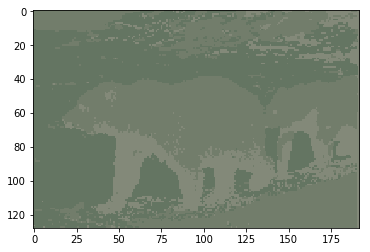

In [374]:
from sklearn import mixture

# reshaping the pixels matrix
r = rescale(y,0.4,mode='reflect')
img = np.reshape(r, (r.shape[0]*r.shape[1], 3))

n_clusters = 3

gmm = mixture.GaussianMixture(n_components=n_clusters, covariance_type='full')
t0 = time.time()
img_gmm = gmm.fit(img)
img_labels = img[gmm.predict(img)].astype(float)
t1 = time.time()
img_labels.shape = r.shape

plt.imshow(img_labels)
title = 'Gaussian Mixture Model clustering time to do: %.2fs' % (t1 - t0)
print(title)
plt.show()
